<a href="https://colab.research.google.com/github/GuilhermeBorba2/Projetos-DataScience/blob/main/Reducao_de_Dimensoes_Vazio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Component Analysis (PCA)
Análise dos Principais Componentes

In [3]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import datasets


In [4]:
# iris
iris = datasets.load_iris()

In [6]:
type(iris)

sklearn.utils._bunch.Bunch

In [7]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [12]:
X=iris['data']
y=iris['target']

In [9]:
X.shape, 

(150, 4)

In [11]:
y.shape

(150,)

In [13]:
X=StandardScaler().fit_transform(X)

In [16]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [17]:
pd.DataFrame(X, columns=iris['feature_names']).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [18]:
pca= PCA(n_components=2)

In [19]:
X.shape

(150, 4)

In [20]:
pc = pca.fit_transform(X)

In [22]:
pc.shape

(150, 2)

In [24]:
pc[:,1]

array([ 0.4800266 , -0.67413356, -0.34190802, -0.59739451,  0.64683538,
        1.48917752,  0.0476442 ,  0.22314807, -1.11532768, -0.46901356,
        1.04369065,  0.13307834, -0.72867617, -0.96150673,  1.86005711,
        2.68628449,  1.48360936,  0.48883832,  1.40501879,  1.12784938,
        0.40885571,  0.92412143,  0.45834367,  0.08555853,  0.13725446,
       -0.62561859,  0.24216355,  0.52714953,  0.31321781, -0.3377319 ,
       -0.50454069,  0.42369507,  1.79357586,  2.15072788, -0.46020184,
       -0.2061074 ,  0.66155811,  0.59229277, -0.90418004,  0.26887896,
        0.44171539, -2.33741516, -0.47910069,  0.47232667,  1.14222926,
       -0.71105273,  1.1204297 , -0.38624687,  0.99795976,  0.00921636,
        0.86297242,  0.59461473,  0.61629765, -1.75440399, -0.20842105,
       -0.59328364,  0.77301931, -1.85242909,  0.03222608, -1.03401828,
       -2.65407282, -0.06329519, -1.76472438, -0.18622461, -0.43900321,
        0.50906396, -0.19631173, -0.79209574, -1.6222438 , -1.30

In [25]:
pc[y==2,0]

array([1.84456887, 1.15788161, 2.20526679, 1.44015066, 1.86781222,
       2.75187334, 0.36701769, 2.30243944, 2.00668647, 2.25977735,
       1.36417549, 1.60267867, 1.8839007 , 1.2601151 , 1.4676452 ,
       1.59007732, 1.47143146, 2.42632899, 3.31069558, 1.26376667,
       2.0377163 , 0.97798073, 2.89765149, 1.33323218, 1.7007339 ,
       1.95432671, 1.17510363, 1.02095055, 1.78834992, 1.86364755,
       2.43595373, 2.30492772, 1.86270322, 1.11414774, 1.2024733 ,
       2.79877045, 1.57625591, 1.3462921 , 0.92482492, 1.85204505,
       2.01481043, 1.90178409, 1.15788161, 2.04055823, 1.9981471 ,
       1.87050329, 1.56458048, 1.5211705 , 1.37278779, 0.96065603])

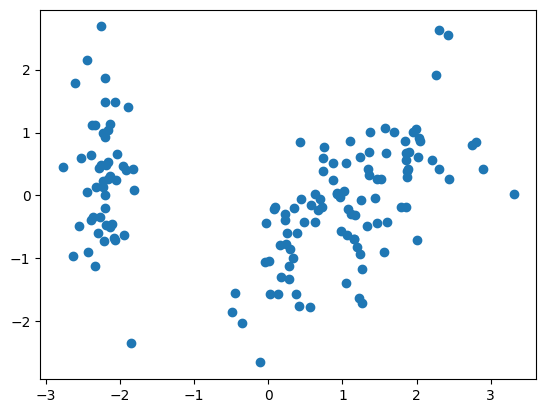

In [28]:
plt.scatter(pc[:,0], pc[:,1])

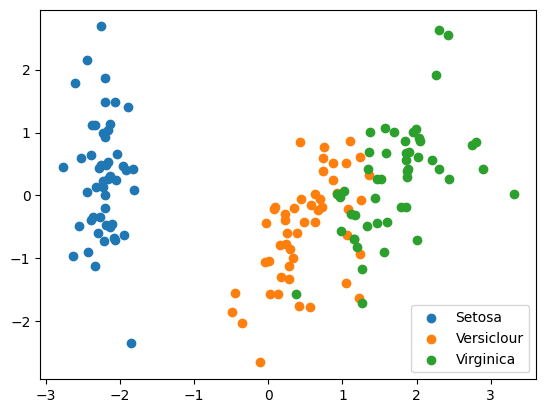

In [32]:
plt.scatter(pc[y==0,0], pc[y==0,1], label='Setosa')
plt.scatter(pc[y==1,0], pc[y==1,1], label= 'Versiclour')
plt.scatter(pc[y==2,0], pc[y==2,1], label= 'Virginica')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [33]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [34]:
sum(pca.explained_variance_ratio_)

0.9581320720000165

# Dígitos

In [36]:
digitos = datasets.load_digits()
X = digitos['data']
y = digitos['target']

In [37]:
X.shape, y.shape

((1797, 64), (1797,))

projetando 64 dimensões em apenas 2D


<ipython-input-45-407d3b36ab33>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  s=80, cmap=plt.cm.get_cmap('nipy_spectral',10))


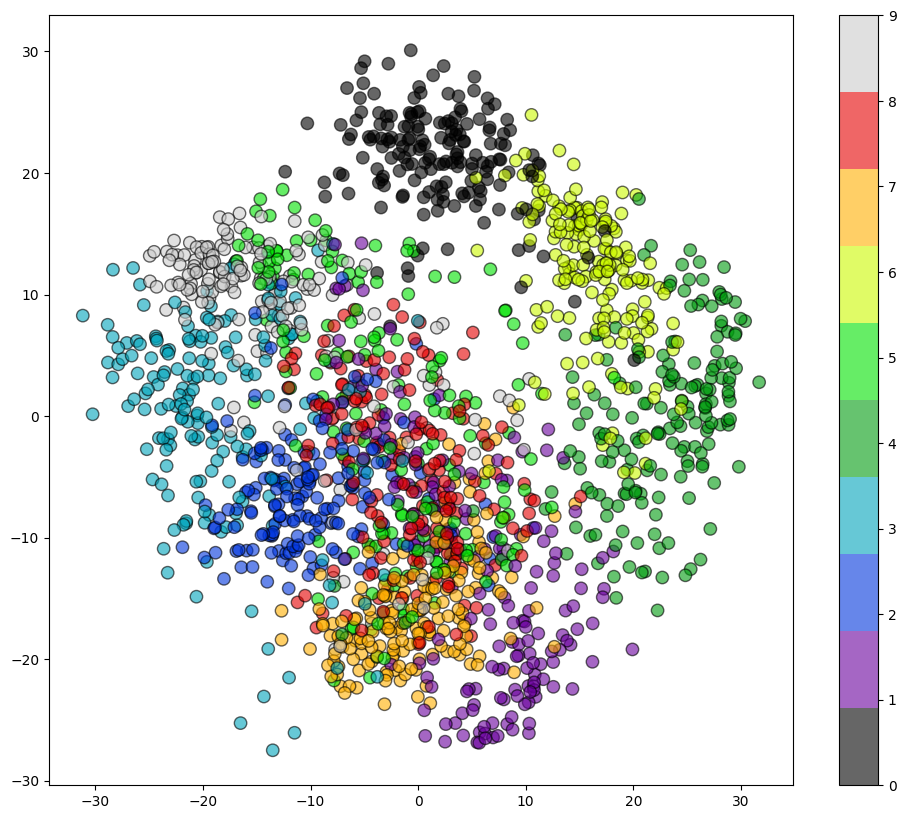

In [45]:
pca = PCA(n_components=2)
X_reduzido = pca.fit_transform(X)

print(f'projetando {X.shape[1]} dimensões em apenas 2D')
plt.figure(figsize=(12,10))
plt.scatter(X_reduzido[:,0], X_reduzido[0:,1], c=y, edgecolor='black', alpha=0.6,
            s=80, cmap=plt.cm.get_cmap('nipy_spectral',10))
plt.colorbar()
plt.show()

# TSNE

In [50]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=123)
X_tsne = tsne.fit_transform(X)

In [51]:
X_tsne.shape

(1797, 2)

<ipython-input-52-bc53d8b8c97f>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('nipy_spectral',10))


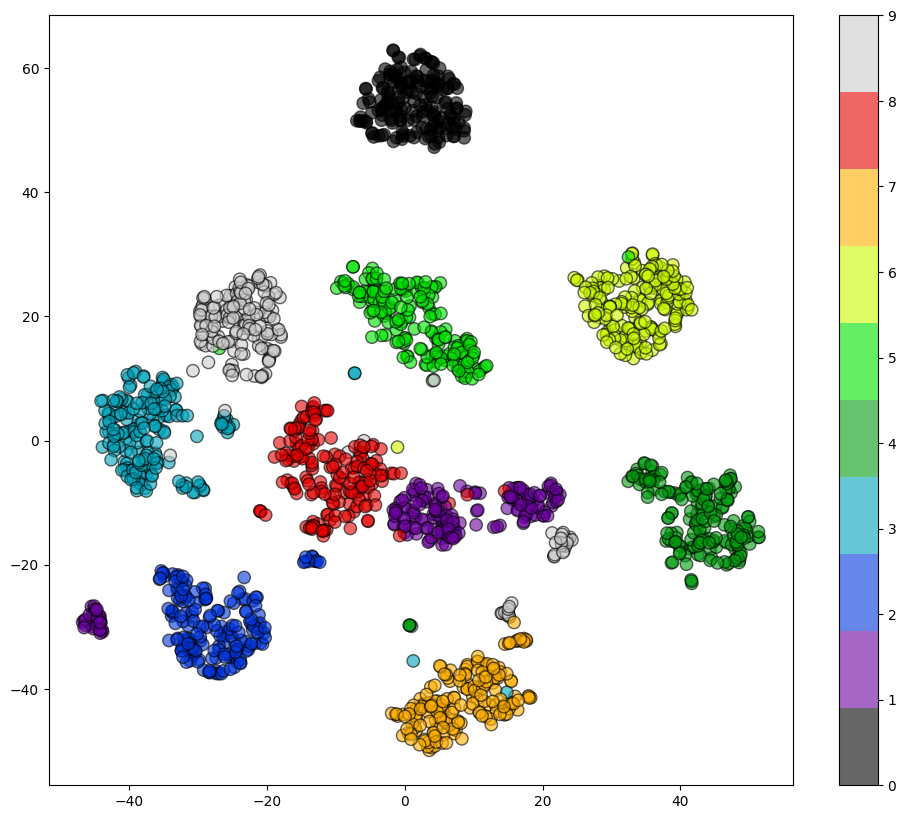

In [52]:
plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y, edgecolor='black', alpha=0.6, s=80,
            cmap=plt.cm.get_cmap('nipy_spectral',10))
plt.colorbar()
plt.show()

In [71]:
pca = PCA(0.95)

In [72]:
pca.fit_transform(X)

array([[ -1.25946645,  21.27488348,  -9.46305462, ...,   3.67072108,
         -0.9436689 ,  -1.13250195],
       [  7.9576113 , -20.76869896,   4.43950604, ...,   2.18261819,
         -0.51022719,   2.31354911],
       [  6.99192297,  -9.95598641,   2.95855808, ...,   4.22882114,
          2.1576573 ,   0.8379578 ],
       ...,
       [ 10.8012837 ,  -6.96025223,   5.59955453, ...,  -3.56866194,
          1.82444444,   3.53885886],
       [ -4.87210009,  12.42395362, -10.17086635, ...,   3.25330054,
          0.95484174,  -0.93895602],
       [ -0.34438963,   6.36554919,  10.77370849, ...,  -3.01636722,
          1.29752723,   2.58810313]])

In [73]:
pca.n_components_

29

In [74]:
np.arange(1, pca.n_components_+1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

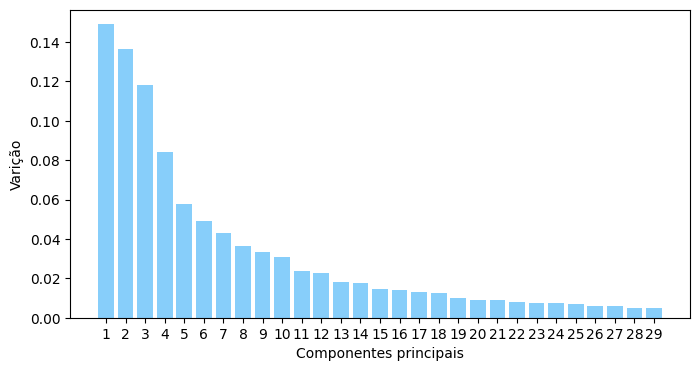

In [75]:
plt.figure(figsize=(8,4))
plt.bar(np.arange(1, pca.n_components_+1), pca.explained_variance_ratio_[:pca.n_components_], color='lightskyblue')
plt.xlabel('Componentes principais')
plt.ylabel('Varição')
plt.xticks(np.arange(1, pca.n_components_+1))
plt.show()

Fontes:
 * http://bit.ly/2NiVYCP
 * http://bit.ly/34wZ7EO